In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('BankChurners.csv')

In [36]:
df1 = df.copy()

In [37]:
df1.head()

,CustomerId,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditLevel
0,15762418,Spain,3,121681.82,1,1,0,128643.35,1,8
1,15749905,Spain,6,0.00,1,1,0,50213.81,1,7
2,15600911,France,2,182888.08,1,1,0,3061.00,0,7
3,15572762,Germany,2,102278.79,2,1,0,89822.48,0,2
4,15627848,France,7,109346.13,2,1,0,102665.92,0,7


In [41]:
df1.isnull().sum()

CustomerId         0
Geography          0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
CreditLevel        0
dtype: int64

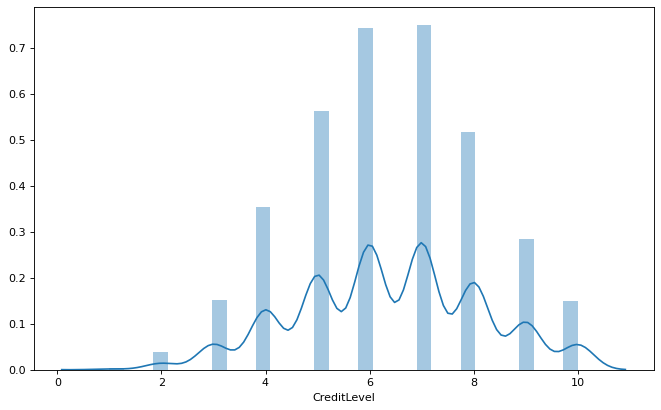

In [42]:
plt.figure(figsize=(10,6),dpi=80)
#df1['CreditLevel'].plot.hist()
sns.distplot(df1['CreditLevel'])

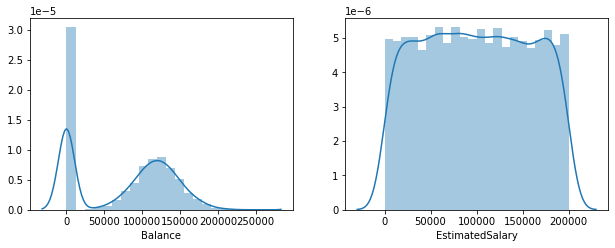

In [39]:
feature=['Balance','EstimatedSalary']
i=1
plt.figure(figsize=(16, 12))
for x in feature:
  plt.subplot(3,3,i)
  sns.distplot(df1[x])
  i+=1

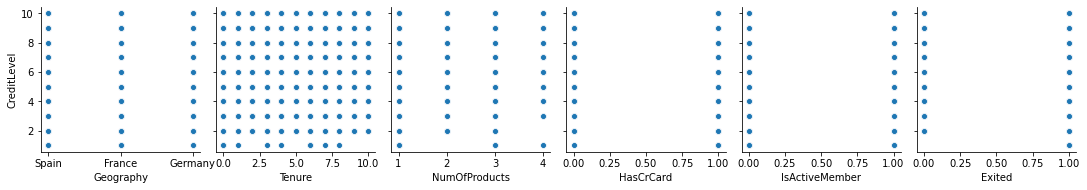

In [40]:
sns.pairplot(x_vars=['Geography','Tenure','NumOfProducts', 
         'HasCrCard', 'IsActiveMember', 'Exited'],y_vars=['CreditLevel'],data=df,dropna=True)

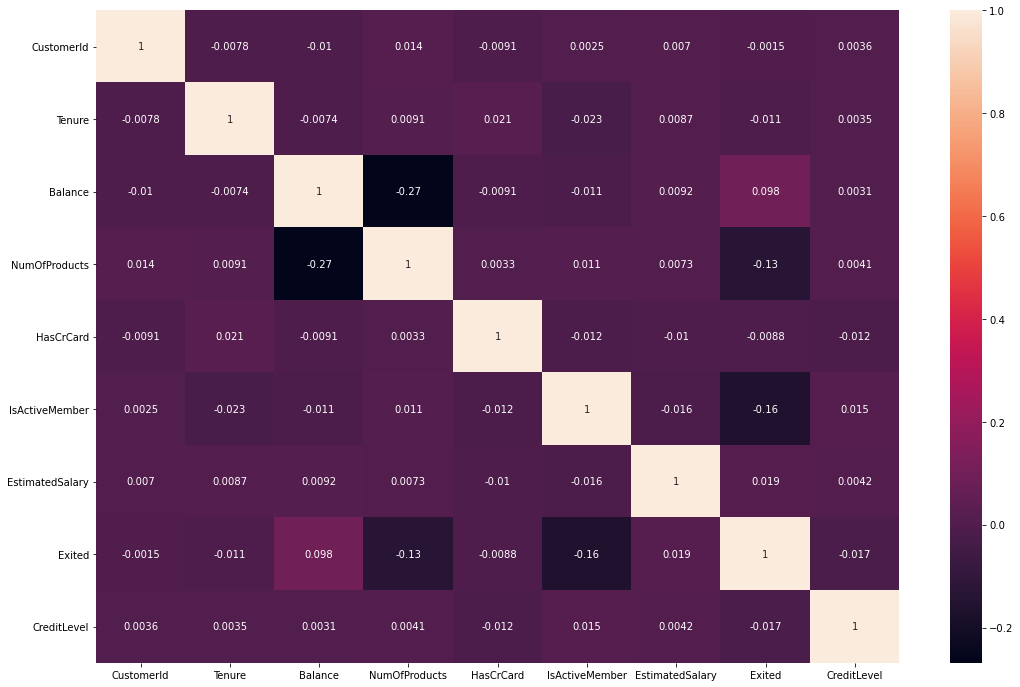

In [43]:
corr_matrix = df1.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, annot=True)

In [44]:
from sklearn import linear_model

In [45]:
#fill up null value of balance
zero_data = []
norm_data = []
for item in df1.values:
    if item[3] == 0:
        zero_data.append(item)
    else:
        norm_data.append(item)

train = pd.DataFrame(norm_data)
test = pd.DataFrame(zero_data)
test = test.drop(columns=0).drop(columns=1).drop(columns=3).drop(columns=9)
x_test = test

y_train = train[3]
x_train = train.drop(columns=0).drop(columns=1).drop(columns=3).drop(columns=9)

x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

model = linear_model.LinearRegression()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)
res = []
index = 0
for item in df1['Balance']:
    if item != 0:
        res.append(item)
    else:
        res.append(y_predict[index])
        index += 1
df1['Balance'] = res

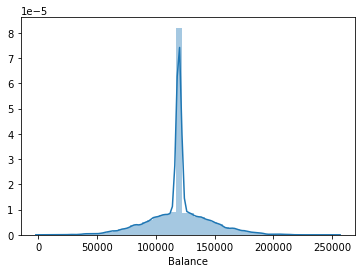

In [46]:
sns.distplot(df1['Balance'])

In [47]:
#change categorical variable into dummy variable
class_feature=['Geography']
for x in class_feature:
    all_data = pd.get_dummies(df1[x])
    df1=pd.concat([df1, all_data], axis=1)

df1.drop('Geography',axis=1)

,CustomerId,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditLevel,France,Germany,Spain
0,15762418,3,121681.820000,1,1,0,128643.35,1,8,0,0,1
1,15749905,6,121156.669272,1,1,0,50213.81,1,7,0,0,1
2,15600911,2,182888.080000,1,1,0,3061.00,0,7,1,0,0
3,15572762,2,102278.790000,2,1,0,89822.48,0,2,0,1,0
4,15627848,7,109346.130000,2,1,0,102665.92,0,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,15769645,3,119242.578597,1,1,1,48108.72,0,6,1,0,0
8996,15635905,6,119083.840220,2,1,1,43001.46,0,6,0,0,1
8997,15636388,7,98775.230000,1,1,0,114603.96,0,7,0,1,0
8998,15688951,8,119654.440000,2,0,1,148412.24,1,9,0,1,0


In [48]:
df1=df1.drop('CustomerId',axis=1)